<a href="https://colab.research.google.com/github/harshp777/Machine-learning/blob/master/Image%20Classification%20/Model_CIFAR_10_Dataset_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


Using TensorFlow backend.


These are some configuration parameters and hyperparameters.

In [0]:
# The number of training samples per batch. 128 is a reasonable number.
batch_size = 64

# epochs is the number of times the model is trained with the data set, more can be better, up to a point
epochs = 200

# dropout is a common regularization hyperperameter. It helps to avoid overfitting or memorizing the input.
dropout = 0.5

 Load the dataset  CIFAR-10 from keras datasets module 

In [4]:
from keras.datasets import cifar10
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()


170500096/170498071 [==============================] - 6s 0us/step


In [6]:
#Print the data type of x_train
print(type(train_X))
#Print the data type of y_train
print(type(train_Y))
#Print the data type of x_test
print(type(test_X))
#Print the data type of y_test
print(type(test_Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [11]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [12]:
index = 0
train_X[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

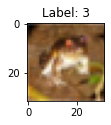

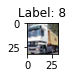

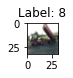

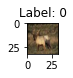

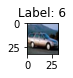

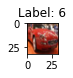

In [13]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(n,1,i+1)
  plt.imshow(train_X[i])
  plt.title('Label: %d' % test_Y[i])
  plt.show()

Convert the pixel values of the dataset to float type and then normalize the dataset.

In [0]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0


In [17]:
print(train_X)

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

Performing  the one-hot encoding for target classes

In [0]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 # Our data set contains 10 classes, so the number of classes is 10

num_classes=test_Y.shape[1]

In [21]:
print(num_classes)

10


In [24]:
print(train_Y)
print()
print('The one hot label is:', train_Y[0])


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# **Define** **Model**

By Creating   the sequential model and adding the layers 



In [0]:
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
	# compile model
	sgd = SGD(lr=0.001, momentum=0.9)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



# Train Model




In [0]:
# compile the model 
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
# Train model for a given number of epochs

history=model.fit(train_X,train_Y,validation_data=(test_X,test_Y),verbose=1,epochs=epochs,batch_size=batch_size)



Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 16s 328us/step - loss: 2.0355 - accuracy: 0.3247 - val_loss: 1.5130 - val_accuracy: 0.4500
Epoch 2/200
50000/50000 [==============================] - 10s 191us/step - loss: 1.5235 - accuracy: 0.4425 - val_loss: 1.4031 - val_accuracy: 0.4994
Epoch 3/200
50000/50000 [==============================] - 10s 190us/step - loss: 1.3963 - accuracy: 0.4899 - val_loss: 1.2720 - val_accuracy: 0.5420
Epoch 4/200
50000/50000 [==============================] - 9s 188us/step - loss: 1.3042 - accuracy: 0.5273 - val_loss: 1.4088 - val_accuracy: 0.5065
Epoch 5/200
50000/50000 [==============================] - 9s 188us/step - loss: 1.2303 - accuracy: 0.5566 - val_loss: 1.1843 - val_accuracy: 0.5831
Epoch 6/200
50000/50000 [==============================] - 9s 187us/step - loss: 1.1740 - accuracy: 0.5795 - val_loss: 1.1575 - val_accuracy: 0.5836
Epoch 7/200
50000/50000 [===========================

Test loss 0.47789035730957985
Test accuracy 0.8652999997138977


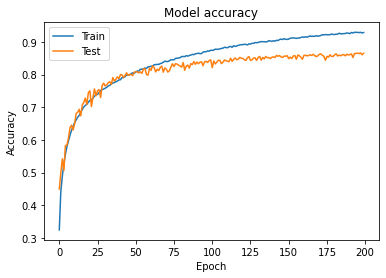

In [0]:

# Evaluate model against test data

score=model.evaluate(test_X,test_Y,verbose=0)
print('Test loss',score[0])
print('Test accuracy',score[1])

# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



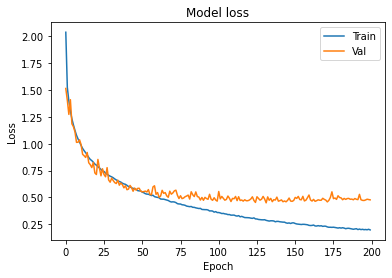

In [0]:
#Visualize the models loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


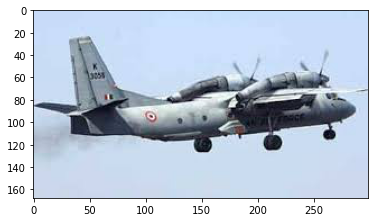

In [3]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}

#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab
new_image = plt.imread("aeroplane.jpg") #Read in the image (3, 14, 20)
img = plt.imshow(new_image)


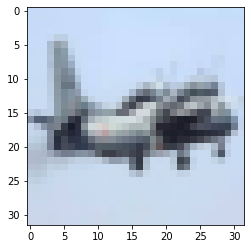

In [4]:
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)


In [10]:
predictions = model.predict(np.array( [resized_image] ))
predictions.shape
print(predictions)

[[9.9999118e-01 4.3610171e-06 3.1937302e-06 3.4522344e-08 1.9015289e-07
  4.2697715e-10 1.7504719e-08 6.6644130e-09 9.6990777e-07 2.5088944e-08]]


In [11]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#Show the sorted labels in order from highest probability to lowest
print(list_index)

[0, 1, 2, 8, 4, 3, 9, 6, 7, 5]


# Prediction

In [12]:
i=0
for i in range(10):
  print(results[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')


aeroplane : 100.0 %
automobile : 0.0 %
bird : 0.0 %
ship : 0.0 %
deer : 0.0 %
cat : 0.0 %
truck : 0.0 %
frog : 0.0 %
horse : 0.0 %
dog : 0.0 %


In [0]:
	model.save('final_model.h5')


In [26]:
from keras.models import load_model
model = load_model('final_model.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


